In [15]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
plt.style.use("seaborn")

In [21]:
h = ["n", "l", "vi", "v", "vf", "vi_fwd", "vf_fwd", "s_int", "s1", "s2", "msk", "a"]
data = pd.read_csv("test.csv", names=h)

In [22]:
bit_mask = [bin(i) for i in data["msk"]]
data["msk"] = bit_mask

In [23]:
data = data.reindex(data.index[::-1])
data.reset_index(drop=True, inplace = True)
data

,n,l,vi,v,vf,vi_fwd,vf_fwd,s_int,s1,s2,msk,a
0,150,112.026783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0b11111,100.00000
1,140,10.000000,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,1.388889,8.611111,0b110,100.00000
2,130,15.000000,50.000000,16.666667,0.000000,50.000000,0.000000,0.000000,11.111111,13.611111,0b11,100.00000
3,120,5.000000,48.737736,54.200401,50.000000,48.737736,50.000000,2.811583,22.845388,-17.222222,0b10110,100.00000
4,110,6.283185,48.737736,42.792839,48.737736,48.737736,48.737736,3.141593,12.559487,-6.276301,0b11001,86.60254
5,100,8.000000,56.303804,59.772423,48.737736,56.303804,48.737736,2.013121,18.871631,-14.845388,0b10110,100.00000
6,90,3.000000,50.696334,56.303804,56.303804,50.696334,56.303804,3.000000,21.871631,21.871631,0b10100,100.00000
7,80,3.162278,44.018891,50.696334,50.696334,44.018891,50.696334,3.162278,25.033908,25.033908,0b10100,100.00000
8,70,3.605551,34.879113,44.018891,44.018891,34.879113,44.018891,3.605551,28.639460,28.639460,0b10100,100.00000
9,60,6.082763,0.000000,34.879113,34.879113,0.000000,34.879113,6.082763,34.722222,34.722222,0b10100,100.00000


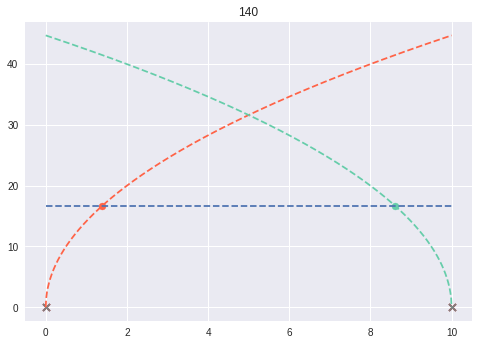

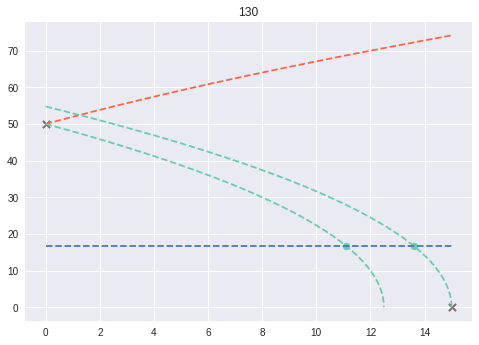

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


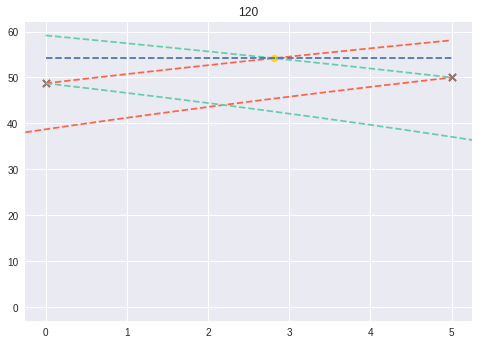

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


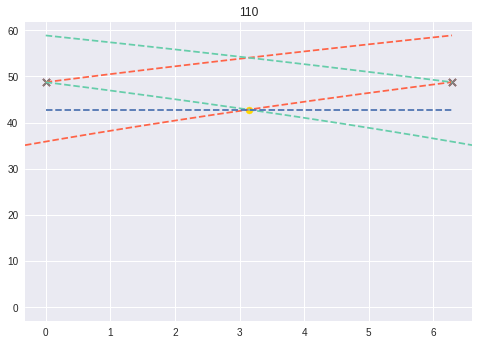

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


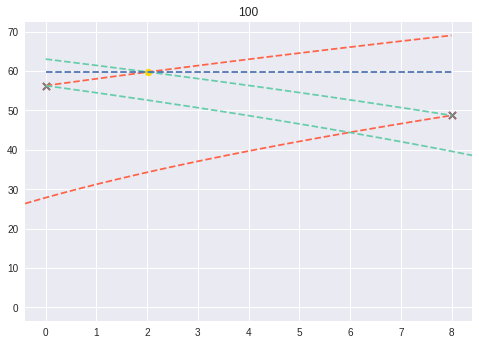

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


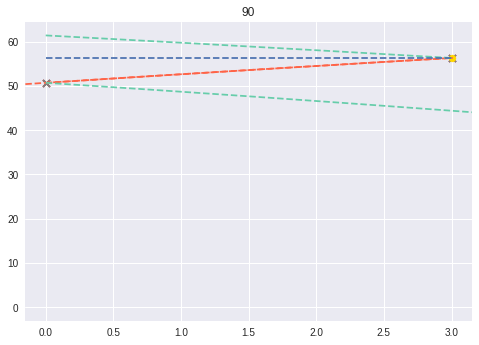

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


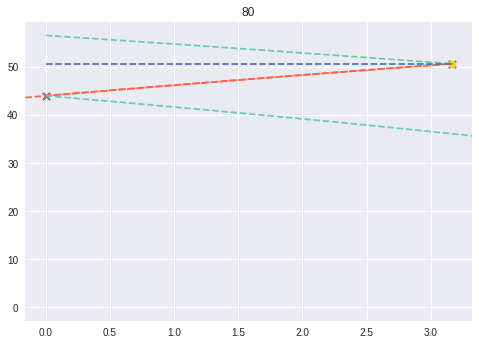

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


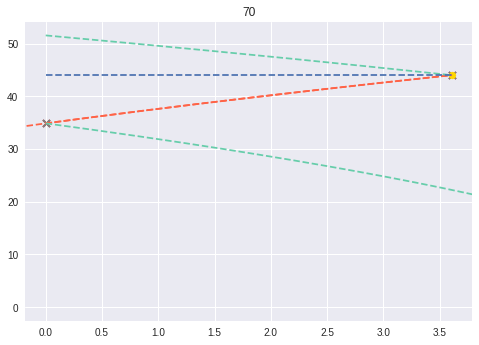

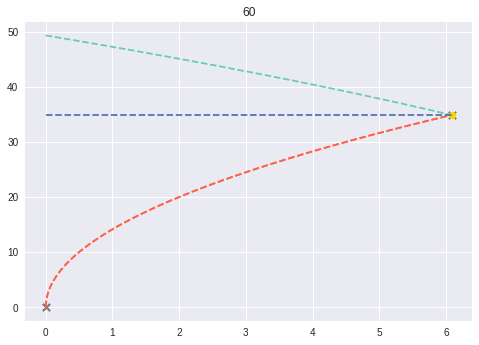

/tmp/ipykernel_75274/4069490800.py:17: RuntimeWarning: invalid value encountered in sqrt
  v2ds = np.sqrt(-2*d.a * (s_d_second_point-d.l) + pow(d.vf,2))


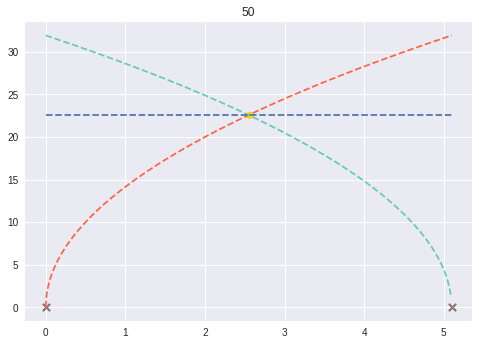

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


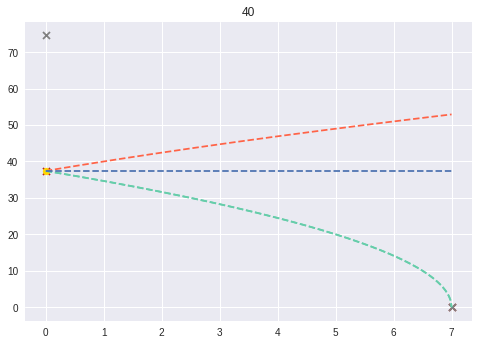

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


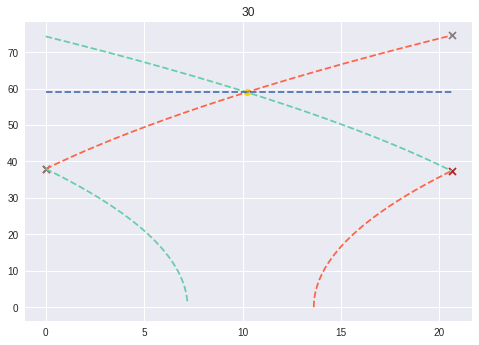

/tmp/ipykernel_75274/4069490800.py:16: RuntimeWarning: invalid value encountered in sqrt
  v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))


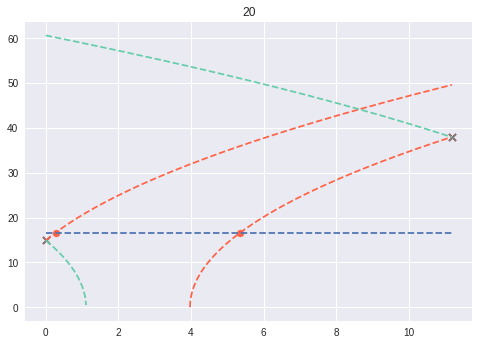

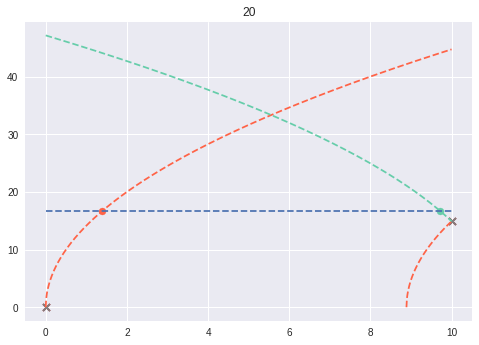

IndexError: single positional indexer is out-of-bounds

In [25]:
howmany = 18
for i in range(howmany):
    d = data.iloc[i]
    if (int(d.msk,2)&0b01111) != 0b01111:
        step = 0.01
        s0a = d.l - (d.vf**2)/(2*d.a)
        s0d = - (d.vi**2)/(-2*d.a)

        s_a_first_point = np.arange(stop=d.l + step, step = step)
        s_a_second_point = np.arange(start=s0a, stop=d.l + step, step=step)
        s_d_first_point = np.arange(stop=s0d + step, step = step)
        s_d_second_point = np.arange(start=0, stop=d.l + step, step=step)

        v1as = np.sqrt(2*d.a * s_a_first_point + pow(d.vi,2))
        v2as = np.sqrt(2*d.a * (s_a_second_point-s0a))
        v1ds = np.sqrt(-2*d.a * (s_d_first_point-s0d))
        v2ds = np.sqrt(-2*d.a * (s_d_second_point-d.l) + pow(d.vf,2))

        plt.title(d.n)
        plt.plot(s_a_first_point, v1as, linestyle="--", color="tomato")
        plt.plot(s_a_second_point, v2as, linestyle="--", color="tomato")
        plt.plot(s_d_first_point, v1ds, linestyle="--", color="mediumaquamarine")
        plt.plot(s_d_second_point, v2ds, linestyle="--", color="mediumaquamarine")

        plt.scatter(0, d.vi, color="firebrick", marker='x')
        plt.scatter(d.l, d.vf,  color="firebrick", marker = 'x')
        plt.scatter(0, d.vi_fwd, color="grey", marker='x')
        plt.scatter(d.l, d.vf_fwd,  color="grey", marker = 'x')
        plt.hlines(d.v, 0, d.l, linestyle='--')

        if (int(d.msk,2)&0b10000):
            plt.scatter(d.s_int, d.v, color="gold")
        else:
            color_s1 = "tomato" if (int(d.msk, 2) & 0b00100 > 0) else "mediumaquamarine"
            color_s2 = "tomato" if (int(d.msk, 2) & 0b01000 > 0) else "mediumaquamarine"
            plt.scatter(d.s1, d.v, color=color_s1)
            plt.scatter(d.s2, d.v, color=color_s2) 

        plt.xlim([-0.05 * d.l, d.l * (0.05 + 1)]) # extend the range of 5%
        plt.show()
    


In [ ]:
int(d.msk,2)

31

In [ ]:
0b1111

15